# University Certificate in Artificial Intelligence (Hands on AI, Third Challenge, 2022-2023, UMONS)
# Forecasting methods



In [54]:
if False:
    # The dataset and package "main" are in the GitHub repository
    !git clone https://github.com/bsouhaib/Hands-On-AI-2022-Challenge3.git
    %cd Hands-On-AI-2022-Challenge3/Exercises
    # These packages are not installed by default
    !pip3 install pmdarima supersmoother

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [10, 5]
sns.set_theme()

## Simulated time series (ARMA)

We will simulate a time series from the following ARMA process:
$$
y_t = 0.75 y_{t-1} + 0.25 y_{t-2} + 0.65 \varepsilon_{t-1} + 0.35 \varepsilon_{t-2} + \varepsilon_t
$$

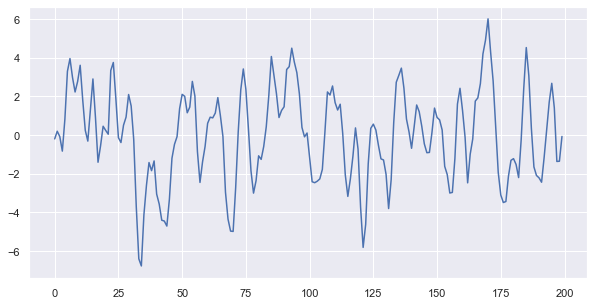

In [56]:
import statsmodels.api as sm

np.random.seed(12345)

T = 200

# ARMA parameters
arparams = np.array([0.75, -0.25])
maparams = np.array([0.65, 0.35])
ar_term = np.r_[1, -arparams]  # add zero-lag and negate
ma_term = np.r_[1, maparams]  # add zero-lag

arma_process = sm.tsa.ArmaProcess(ar_term, ma_term)

y = arma_process.generate_sample(T)
plt.plot(y)

* Plot the autocorrelation function (ACF) of the simulated series for the first 10 lags.


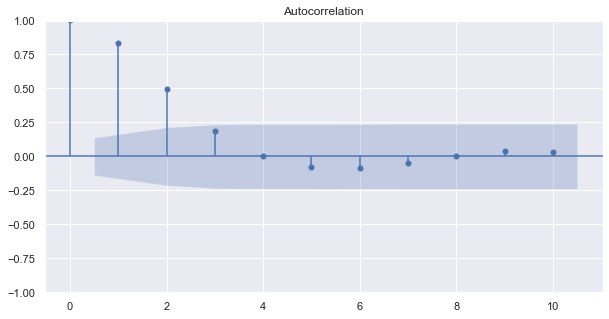

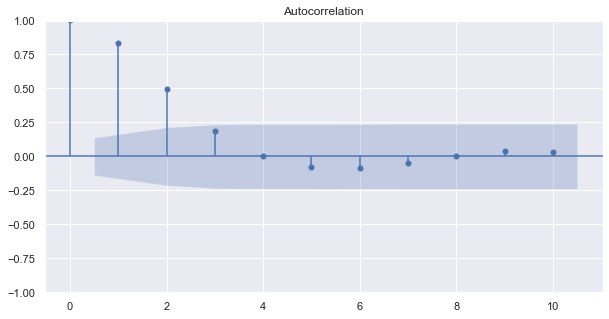

In [57]:
from statsmodels.graphics.tsaplots import plot_acf

# Hint: use plot_acf

###
plot_acf(y, lags=10)

* Fit an ARIMA model to the simulated time series using auto_arima. Do you recover the true parameters? To obtain details about your model fit, you can use the following functions: summary(), arparams(), and maparams().

In [58]:
from pmdarima.arima import auto_arima

###
model = auto_arima(y)

In [59]:
def result_table(model):
    return pd.DataFrame({
        'Fitted parameters': [str(model.arparams()), str(model.maparams())],
        'True parameters': [-ar_term[1:], ma_term[1:]],
    }, index=['AR', 'MA'])

result_table(model)

,Fitted parameters,True parameters
AR,[ 0.8205847 -0.24874044],"[0.75, -0.25]"
MA,[0.66980022 0.38118423],"[0.65, 0.35]"


In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -283.430
Date:                Thu, 15 Dec 2022   AIC                            576.859
Time:                        19:59:16   BIC                            593.351
Sample:                             0   HQIC                           583.533
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8206      0.166      4.930      0.000       0.494       1.147
ar.L2         -0.2487      0.144     -1.731      0.083      -0.530       0.033
ma.L1          0.6698      0.158      4.239      0.000       0.360       0.979
ma.L2          0.3812      0.114      3.343      0.001       0.158       0.605
sigma2         0.9843      0.105      9.406      0.000       0.779       1.189
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.96   Prob(JB):                         0.79
Heteroskedasticity (H):               0.84   Skew:                             0.09
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* Increase the size of the simulated series (e.g. $T=1000$) and refit an ARIMA model using auto_arima. Do you recover the true parameters?

In [61]:
###
T = 1000
y = arma_process.generate_sample(T)
model = auto_arima(y, information_criterion="bic")

result_table(model)

,Fitted parameters,True parameters
AR,[ 0.66081118 -0.21941883],"[0.75, -0.25]"
MA,[0.71169382 0.38578069],"[0.65, 0.35]"


* Change the default parameters of the auto_arima function to get faster results. Eploit the fact that you know the "true" data generating process.

In [62]:
# Point d'interrogation partout
model = auto_arima(
    y,
    d=0,
    start_p=2,
    max_p=2,
    start_q=2,
    max_q=2,
    D=0,
    start_P=0,
    max_P=0,
    start_Q=0,
    max_Q=0,
    seasonal=False,
    information_criterion="bic",
)

result_table(model)

,Fitted parameters,True parameters
AR,[ 0.66081118 -0.21941883],"[0.75, -0.25]"
MA,[0.71169382 0.38578069],"[0.65, 0.35]"


In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1390.289
Date:                Thu, 15 Dec 2022   AIC                           2790.578
Time:                        19:59:20   BIC                           2815.116
Sample:                             0   HQIC                          2799.904
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6608      0.079      8.333      0.000       0.505       0.816
ar.L2         -0.2194      0.062     -3.524      0.000      -0.341      -0.097
ma.L1          0.7117      0.076      9.315      0.000       0.562       0.861
ma.L2          0.3858      0.054      7.139      0.000       0.280       0.492
sigma2         0.9424      0.041     22.786      0.000       0.861       1.023
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.26
Prob(Q):                              1.00   Prob(JB):                         0.07
Heteroskedasticity (H):               0.87   Skew:                             0.17
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Real-world time series

In [64]:
# Read the data file
DF = pd.read_csv("../data/data_train.csv", parse_dates=True)
DF["Day"] = pd.to_datetime(DF["Day"], format="%Y-%m-%d")
DF.set_index("Day", inplace=True)
DF = DF.asfreq("D")
DF.fillna(method="backfill", inplace=True)

DF

,series-001,series-002,series-003,series-004,series-005,series-006,series-007,series-008,series-009,series-010,...,series-102,series-103,series-104,series-105,series-106,series-107,series-108,series-109,series-110,series-111
Day,,,,,,,,,,,,,,,,,,,,,
1996-03-18,13.407029,11.550454,5.640590,13.180272,9.778912,9.240363,14.937642,2.891156,7.341270,10.289116,...,12.910998,3.670635,14.200680,9.778912,7.695578,8.857710,9.297052,10.416667,11.635488,8.337717
1996-03-19,14.725057,13.591270,14.399093,8.446712,10.813492,11.635488,16.284014,12.358277,9.155329,12.712585,...,15.447846,3.557256,7.128685,11.564626,5.541383,11.380385,12.429138,14.923469,10.586735,9.876381
1996-03-20,20.564059,15.036848,24.418934,19.515306,21.612812,12.103175,16.666667,16.383220,10.586735,14.441610,...,20.372732,4.846939,24.900794,13.803855,16.312358,11.777211,13.251134,25.864512,12.570862,16.320358
1996-03-21,34.708050,21.570295,28.784014,28.883220,38.520408,21.414399,23.568594,30.158730,12.500000,19.401927,...,26.296769,7.086168,26.261338,23.341837,23.951247,18.820862,24.815760,37.996032,17.517007,22.553919
1996-03-22,26.629819,19.444444,20.620748,19.472789,24.744898,24.674036,26.303855,31.179138,7.157029,21.541950,...,33.056973,5.357143,32.893991,23.129252,24.064626,24.305556,19.231859,33.290816,24.291383,18.095739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-03-18,30.087868,18.750000,21.683673,27.054989,25.283447,23.767007,21.414399,17.332766,8.390023,22.874150,...,21.584467,6.746032,23.922902,11.706349,20.053855,20.734127,14.866780,33.276644,16.354875,19.108364
1998-03-19,54.138322,29.676871,21.683673,36.848073,41.723356,30.881519,30.796485,28.996599,12.641723,32.397959,...,33.149093,11.337868,46.428571,21.981293,28.698980,24.829932,29.109977,49.957483,25.070862,25.512888
1998-03-20,53.500567,30.725624,35.586735,29.946145,33.475057,37.074830,40.419501,37.046485,9.892290,30.810658,...,39.725057,7.383787,42.191043,28.968254,35.402494,29.676871,2.777778,43.310658,25.255102,22.027880


In [65]:
# Select the series to consider
list_series = ["series-001", "series-002", "series-003"]
DF_all = DF[list_series].copy()

DF_all

,series-001,series-002,series-003
Day,,,
1996-03-18,13.407029,11.550454,5.640590
1996-03-19,14.725057,13.591270,14.399093
1996-03-20,20.564059,15.036848,24.418934
1996-03-21,34.708050,21.570295,28.784014
1996-03-22,26.629819,19.444444,20.620748
...,...,...,...
1998-03-18,30.087868,18.750000,21.683673
1998-03-19,54.138322,29.676871,21.683673
1998-03-20,53.500567,30.725624,35.586735


In [66]:
HORIZON = 7 * 2
DF_train = DF_all[:-HORIZON]
DF_test = DF_all[-HORIZON:]

* Use auto.arima to compute forecasts for all series

In [67]:
from pmdarima.arima import auto_arima

fcts_arima_list = list()

for id_series in list_series:
    print("======", id_series, "======")
    y = DF_train[id_series]
    # Point d'interrogation partout
    model = auto_arima(
        y,
        d=0,
        start_p=0,
        max_p=1,
        start_q=0,
        max_q=1,
        D=0,
        start_P=0,
        max_P=2,
        start_Q=0,
        max_Q=0,
        m=7,
        trace=True,
    )
    f_arima = model.predict(HORIZON)
    f_arima.name = id_series
    fcts_arima_list.append(f_arima)

fcts_arima = pd.concat(fcts_arima_list, axis=1)

====== series-001 ======
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5602.167, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5074.589, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=5386.852, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6962.130, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5405.006, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=5017.239, Time=0.73 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=5110.879, Time=0.77 sec
 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=5012.756, Time=1.19 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=5066.968, Time=0.53 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=5013.979, Time=0.88 sec
 ARIMA(1,0,1)(2,0,0)[7]             : AIC=5079.209, Time=0.28 sec

Best model:  ARIMA(1,0,1)(2,0,0)[7] intercept
Total fit time: 4.902 seconds
====== series-002 ======
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=4683.722, Time=0.02

* Compute naive forecasts for all series

In [68]:
fcts_mean_list = list()
fcts_naive_list = list()
fcts_snaive_list = list()

for series in list_series:
    series_train = DF_train[series]
    series_test = DF_test[series]

    T = len(series_train)

    ## Mean
    meanf = series_train.mean()
    f_mean = pd.Series([meanf for h in range(0, HORIZON)], index=series_test.index)
    f_mean.name = series

    fcts_mean_list.append(f_mean)

    ## Naive
    f_naive = series_train[-1]
    f_naive = pd.Series([f_naive for h in range(0, HORIZON)], index=series_test.index)
    f_naive.name = series

    fcts_naive_list.append(f_naive)

    ## Seasonal naive
    period = 7
    f_snaive = [series_train[T + h - period * ((HORIZON -1)//period + 1)] for h in range(0, HORIZON) ]
    f_snaive = pd.Series(f_snaive, index=series_test.index)
    f_snaive.name = series

    fcts_snaive_list.append(f_snaive)

In [69]:
fcts_mean = pd.concat(fcts_mean_list, axis=1)
fcts_naive = pd.concat(fcts_naive_list, axis=1)
fcts_snaive = pd.concat(fcts_snaive_list, axis=1)

* Compute the Symmetric Mean Absolute Percentage Error (SMAPE) for all series.

In [70]:
def smape(y_true, y_pred):
    assert (y_pred >= 0).all().all()
    denominator = (y_true + y_pred) / 200.0
    SAPE = np.abs(y_true - y_pred) / denominator
    SAPE[denominator == 0] = 0.0
    return SAPE.mean().mean()


print(smape(DF_test, fcts_mean))
print(smape(DF_test, fcts_naive))
print(smape(DF_test, fcts_snaive))
print(smape(DF_test, fcts_arima))

31.48277807523365
75.95750732082878
23.45589205366527
22.490792461360552


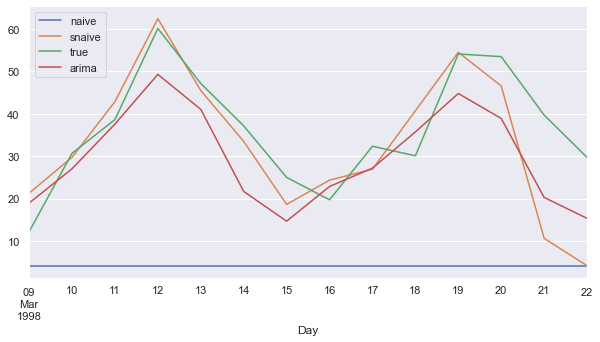

In [89]:
id_series = "series-001"
fcts_naive[id_series].plot(label="naive")
fcts_snaive[id_series].plot(label="snaive")
DF_test[id_series].plot(label="true")
fcts_arima[id_series].plot(label="arima")
plt.legend()

# Neural network forecast

In the following, we will consider two neural network architectures for forecasting. Your task is to play with all the hyperparameters to obtain the best out-of-sample forecasts, i.e. on the test set.

Some important hyperparameters include: n_simul (size of the dataset), LAG (the number of lagged values), LATENT_DIM (the number of units in the layer), BATCH_SIZE (number of samples per mini-batch), EPOCHS (the number of epochs), the optimizer and the early stop strategy.

In [72]:
from pmdarima.arima import auto_arima
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

from main.utils.utils_methods import embed_data, plot_learning_curves
from main.utils.utils import mse, mae, mape, smape

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* We will simulate a time series from a nonlinear stochastic process:


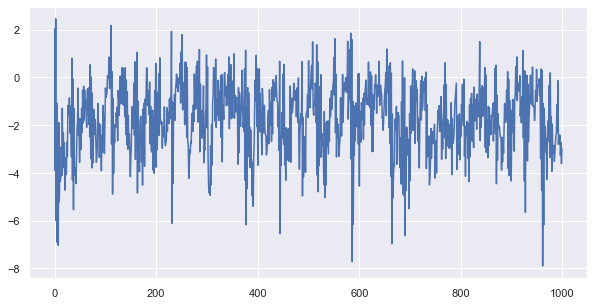

In [73]:
n_simul = 1000
n_burn = 100
n = n_simul + n_burn
noise = np.random.normal(size=n)

y = np.zeros(n)
y[0] = 0
y[1] = 0
for t in range(2, n):
    y[t] = (
        0.3 * y[t - 1]
        + 0.6 * y[t - 2]
        + (0.1 - 0.9 * y[t - 1] + 0.8 * y[t - 2]) * (1 / (1 + np.exp(-10 * y[t - 1])))
        + noise[t]
    )

data = pd.DataFrame(y[n_burn:], columns=["series"])
plt.plot(data)

Choose which loss function you want to experiment with. It is used later in the code to fit and evaluate a neural network model.

In [74]:
# Loss function to be used to optimize the model parameters
loss_fct = "mse"  # 'mae'

# Accuracy measure to be used to evaluate test predictions.
accuracy_measure = mse  # mae # mape # smape

In [75]:
# The forecast horizon
HORIZON = 3

# The number of lagged values.
LAG = 4

# Data split
n = len(data)
n_train = int(0.6 * n)
n_valid = int(0.2 * n)
n_learn = n_train + n_valid

train = data[:n_train]
valid = data[n_train:n_learn]
test = data[n_learn:]

# From time series to input-output data (also called time series embedding)
(
    train_inputs,
    valid_inputs,
    test_inputs,
    X_train,
    y_train,
    X_valid,
    y_valid,
    X_test,
    y_test,
) = embed_data(train, valid, test, HORIZON, LAG, freq=None, variable="series")

In [76]:
display(X_train.head())
display(y_train.head())

tensor    encoder_input                              
feature          series                              
time step           t-3       t-2       t-1         t
3              2.033890 -3.907745  2.454789 -6.002540
4             -3.907745  2.454789 -6.002540 -1.077070
5              2.454789 -6.002540 -1.077070 -6.914464
6             -6.002540 -1.077070 -6.914464 -4.015871
7             -1.077070 -6.914464 -4.015871 -7.043635

tensor       target                    
feature           y                    
time step       t+1       t+2       t+3
3         -1.077070 -6.914464 -4.015871
4         -6.914464 -4.015871 -7.043635
5         -4.015871 -7.043635 -1.894172
6         -7.043635 -1.894172 -5.219019
7         -1.894172 -5.219019 -4.016580

# Multioutput MLP

In [77]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense

# Simple MLP with 1 hidden layer
def mlp_multioutput(X_train, y_train, X_valid, y_valid, LATENT_DIM, BATCH_SIZE, EPOCHS, LAG, HORIZON, 
                    loss, optimizer, earlystop, best_val, verbose):
  
    model = Sequential()
    model.add(Dense(LATENT_DIM, activation="relu", input_shape=(LAG,)))
    model.add(Dense(HORIZON))
    model.compile(optimizer=optimizer, loss=loss)
    
    history = model.fit(
        X_train,
        y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(X_valid, y_valid),
        callbacks=[earlystop, best_val],
        verbose=verbose
    )
    return model, history

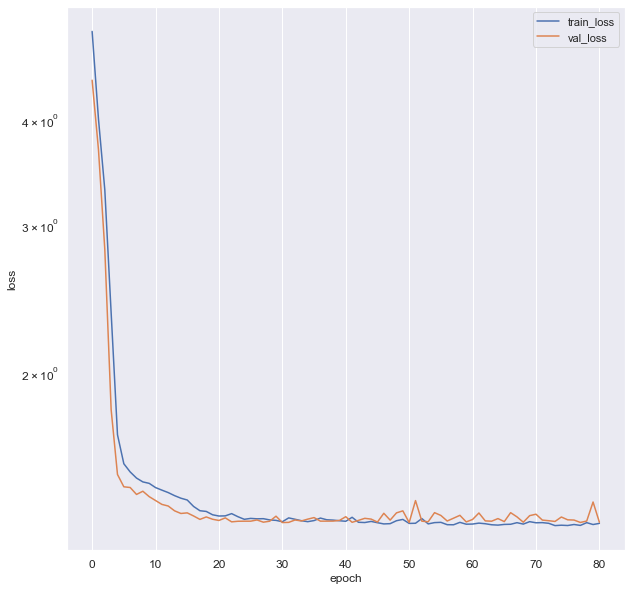

Best epoch: 31


In [78]:
#########################
file_header = "model_" + "mlp_multioutput"
verbose = 0

optimizer_adam = keras.optimizers.Adam(learning_rate=0.01)
earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=50)

LATENT_DIM = 5  # 50   # number of units in the RNN layer
BATCH_SIZE = 32  # number of samples per mini-batch
EPOCHS = 200  # maximum number of times the training algorithm will cycle through all samples
loss = loss_fct

best_val = ModelCheckpoint(
    "../work/" + file_header + "_{epoch:02d}.h5",
    save_best_only=True,
    mode="min",
    save_freq="epoch",
    monitor="val_loss",
)
#########################

model_mlp_multioutput, history_mlp_multioutput = mlp_multioutput(
    X_train,
    y_train,
    X_valid,
    y_valid,
    LATENT_DIM=LATENT_DIM,
    BATCH_SIZE=BATCH_SIZE,
    EPOCHS=EPOCHS,
    LAG=LAG,
    HORIZON=HORIZON,
    loss=loss,
    optimizer=optimizer_adam,
    earlystop=earlystop,
    best_val=best_val,
    verbose=verbose,
)

plot_learning_curves(history_mlp_multioutput)

best_epoch = np.argmin(np.array(history_mlp_multioutput.history["val_loss"])) + 1
print("Best epoch:", best_epoch)
filepath = "../work/" + file_header + "_{:02d}.h5"
model_mlp_multioutput.load_weights(filepath.format(best_epoch))

## Recursive MLP


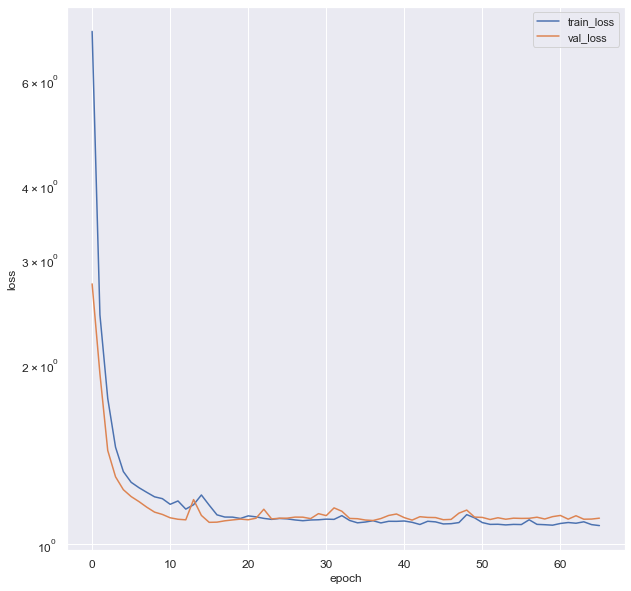

Best epoch: 16


In [79]:
#########################
file_header = "model_" + "mlp_recursive"
verbose = 0

optimizer_adam = keras.optimizers.Adam(learning_rate=0.01)
earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=50)

LATENT_DIM = 5  # number of units in the RNN layer
BATCH_SIZE = 32  # number of samples per mini-batch
EPOCHS = 200  # maximum number of times the training algorithm will cycle through all samples
loss = loss_fct

best_val = ModelCheckpoint(
    "../work/" + file_header + "_{epoch:02d}.h5",
    save_best_only=True,
    mode="min",
    save_freq="epoch",
    monitor="val_loss",
)
#########################

(
    _,
    _,
    _,
    X_train_onestep,
    y_train_onestep,
    X_valid_onestep,
    y_valid_onestep,
    _,
    _,
) = embed_data(train, valid, test, 1, LAG, freq=None, variable="series")

# The recursive MLP is just a multioutput MLP with 1 output.
# However, the predictions given by the multioutput MLP and recursive MLP 
# are not created in the same way.
model_mlp_recursive, history_mlp_recursive = mlp_multioutput(
    X_train_onestep,
    y_train_onestep,
    X_valid_onestep,
    y_valid_onestep,
    LATENT_DIM=LATENT_DIM,
    BATCH_SIZE=BATCH_SIZE,
    EPOCHS=EPOCHS,
    LAG=LAG,
    HORIZON=1,
    loss=loss,
    optimizer=optimizer_adam,
    earlystop=earlystop,
    best_val=best_val,
    verbose=verbose,
)
plot_learning_curves(history_mlp_recursive)

best_epoch = np.argmin(np.array(history_mlp_recursive.history["val_loss"])) + 1
print("Best epoch:", best_epoch)
filepath = "../work/" + file_header + "_{:02d}.h5"
model_mlp_recursive.load_weights(filepath.format(best_epoch))

# Naive forecasts

In [80]:
# len(X_test.values[:, -1])
predictions_naive = np.tile(X_test.values[:, -1], (HORIZON, 1)).T
predictions_naive = pd.DataFrame(
    predictions_naive, columns=[f"t+{t}" for t in range(1, HORIZON + 1)]
)
predictions_naive

,t+1,t+2,t+3
0,-0.287795,-0.287795,-0.287795
1,-1.698263,-1.698263,-1.698263
2,-2.016991,-2.016991,-2.016991
3,-0.069318,-0.069318,-0.069318
4,-3.309987,-3.309987,-3.309987
...,...,...,...
189,-2.806946,-2.806946,-2.806946
190,-2.427357,-2.427357,-2.427357
191,-2.579735,-2.579735,-2.579735
192,-2.414224,-2.414224,-2.414224


# MLP forecasts

In [81]:
predictions_mlp_multioutput = model_mlp_multioutput.predict(X_test)
predictions_mlp_multioutput = pd.DataFrame(
    predictions_mlp_multioutput, columns=[f"t+{t}" for t in range(1, HORIZON + 1)]
)

predictions_mlp_multioutput

7/7 [==============================] - 0s 1ms/step


,t+1,t+2,t+3
0,-1.035537,-0.610979,-1.043665
1,-0.818359,-1.489788,-1.011621
2,-1.698012,-1.760085,-1.583105
3,-1.830377,-0.666426,-1.752355
4,-1.253224,-2.804113,-1.493048
...,...,...,...
189,-1.082165,-2.450253,-1.337058
190,-2.524536,-2.184868,-2.155391
191,-2.118158,-2.268605,-1.909931
192,-2.266918,-2.193959,-1.994384


In [82]:
X_test

tensor    encoder_input                              
feature          series                              
time step           t-3       t-2       t-1         t
803           -2.471868 -1.138942 -1.278107 -0.287795
804           -1.138942 -1.278107 -0.287795 -1.698263
805           -1.278107 -0.287795 -1.698263 -2.016991
806           -0.287795 -1.698263 -2.016991 -0.069318
807           -1.698263 -2.016991 -0.069318 -3.309987
..                  ...       ...       ...       ...
992           -1.140075 -2.268759 -0.136013 -2.806946
993           -2.268759 -0.136013 -2.806946 -2.427357
994           -0.136013 -2.806946 -2.427357 -2.579735
995           -2.806946 -2.427357 -2.579735 -2.414224
996           -2.427357 -2.579735 -2.414224 -3.275181

[194 rows x 4 columns]

In [83]:
for h in range(HORIZON):
    pred = model_mlp_recursive.predict(X_test)
    # `predictions_mlp_recursive` contains the predictions
    if h == 0:
        predictions_mlp_recursive = pred
    else:
        predictions_mlp_recursive = np.hstack((predictions_mlp_recursive, pred))
    # `X_test` is updated at each step
    X_test = pd.DataFrame(
        np.hstack((X_test.to_numpy()[:, 1:], pred)),
        index=X_test.index,
        columns=X_test.columns,
    )

predictions_mlp_recursive = pd.DataFrame(
    predictions_mlp_recursive, columns=[f"t+{t}" for t in range(1, HORIZON + 1)]
)

predictions_mlp_recursive

7/7 [==============================] - 0s 952us/step


,t+1,t+2,t+3
0,-1.008910,-0.560472,-0.821817
1,-0.739075,-1.386600,-0.844695
2,-1.555769,-1.549559,-1.390872
3,-1.911173,-0.715658,-1.637338
4,-1.078074,-2.573605,-1.320698
...,...,...,...
189,-0.951293,-2.228846,-1.167860
190,-2.270304,-1.942133,-1.926810
191,-2.022303,-2.107641,-1.820294
192,-2.209183,-2.049333,-1.909971


In [84]:
predictions_combination = (predictions_mlp_multioutput + predictions_mlp_recursive) / 2

# ARIMA forecasts

In [85]:
test.head()

,series
800,-2.471868
801,-1.138942
802,-1.278107
803,-0.287795
804,-1.698263


In [86]:
print(data[:n_learn])
print(data[n_learn:])

       series
0    2.033890
1   -3.907745
2    2.454789
3   -6.002540
4   -1.077070
..        ...
795 -2.795984
796 -2.879464
797 -1.523096
798 -3.451081
799 -1.782343

[800 rows x 1 columns]
       series
800 -2.471868
801 -1.138942
802 -1.278107
803 -0.287795
804 -1.698263
..        ...
995 -2.414224
996 -3.275181
997 -2.723807
998 -3.612856
999 -2.989643

[200 rows x 1 columns]


In [87]:
model = auto_arima(data[:n_learn])
fcts_list = []
for i in np.arange(len(y_test)):
    pred = model.fit_predict(data[LAG + i : n_learn + LAG + i], n_periods=HORIZON)
    fcts_list.append(pred.to_numpy()[np.newaxis])

predictions_arima = pd.DataFrame(
    np.concatenate(fcts_list), columns=["t+" + str(t) for t in range(1, HORIZON + 1)]
)

# Forecast accuracy

In [88]:
true_values = pd.DataFrame(
    test_inputs["target"], columns=["t+" + str(t) for t in range(1, HORIZON + 1)]
)

predictions = {
    'naive': predictions_naive,
    'mlp_multioutput': predictions_mlp_multioutput,
    'mlp_recursive': predictions_mlp_recursive,
    'combination': predictions_combination,
    'arima': predictions_arima,
}

results = {}
for model_name, prediction in predictions.items():
    results[model_name] = []
    for h in range(1, HORIZON + 1):
        time_horizon = "t+" + str(h)
        results[model_name].append(
            accuracy_measure(true_values[time_horizon], prediction[time_horizon])
        )

pd.DataFrame(results).mean().to_frame()

,0
naive,3.370104
mlp_multioutput,1.141589
mlp_recursive,1.171012
combination,1.145661
arima,1.232427
